In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 7
# d: VT

# Homework 7

**Enter your Name:**  Nathan Simmons
    
**Enter your PID:**  906092282

    
I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [51]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.manifold
# %matplotlib inline
states = pandas.read_csv('State_demographics.csv') 
survey = pandas.read_csv('Survey-3654-Spring2020-clean.csv')
states.shape, survey.shape

((51, 52), (86, 34))

# Extra Imports

In [52]:
import pandas as pd
import numpy as np

SEED = 13
np.random.seed(SEED) # setting seed value for randomness

# Getting the Z Normalized values
As it is frquently required in the assignment so using it in one place

In [5]:
columns = states.columns.tolist() # get the names of columns in a list
states.head() 

,State,Abbrev,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Employment.Private Non-farm Employment,Employment.Private Non-farm Employment Percent Change,...,Sales.Merchant Wholesaler Sales,Sales.Retail Sales,Sales.Retail Sales per Capita,Employment.Firms.American Indian-Owned,Employment.Firms.Asian-Owned,Employment.Firms.Black-Owned,Employment.Firms.Hispanic-Owned,Employment.Firms.Native Hawaiian and Other Pacific Islander-Owned,Employment.Firms.Total,Employment.Firms.Women-Owned
0,Alabama,AL,15.3,22.8,6.1,22.6,83.1,311578,1603100,1.1,...,522527,573448,12364,0.8,1.8,14.8,1.2,0.1,382350,28.1
1,Alaska,AK,9.4,25.3,7.4,27.5,91.6,52991,266627,3.3,...,45636,93033,13635,10.0,3.1,1.5,0.0,0.3,68728,25.9
2,Arizona,AZ,15.9,24.1,6.4,26.9,85.7,420233,2173205,1.8,...,575734,867588,13637,1.9,3.3,2.0,10.7,0.0,491529,28.1
3,Arkansas,AR,15.7,23.8,6.5,20.1,83.7,191530,978094,0.0,...,296597,329742,11602,1.1,1.4,5.5,2.3,0.1,238994,24.5
4,California,CA,12.9,23.6,6.5,30.7,81.2,2983996,13401863,3.5,...,5984564,4550322,12561,1.3,14.9,4.0,16.5,0.3,3425510,30.3


In [26]:
from sklearn.preprocessing import StandardScaler # for Z - Normalization of data
z_scored_mat = StandardScaler().fit_transform(states.drop(['State','Abbrev'],axis=1)) # z score array

X = pd.DataFrame(z_scored_mat,columns=columns[2:]) # convert into a new DataFrame with no State and Abbrev
X['State'] = states['State'] # insert State
X['Abbrev'] = states['Abbrev'] # insert Abbrev
X = X[columns] # make it look like the original one according to initial format

X_input = X.drop(['State','Abbrev'],axis=1).values # Dro the States columns as it is just the 

X.head() # see the first 5 

,State,Abbrev,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Employment.Private Non-farm Employment,Employment.Private Non-farm Employment Percent Change,...,Sales.Merchant Wholesaler Sales,Sales.Retail Sales,Sales.Retail Sales per Capita,Employment.Firms.American Indian-Owned,Employment.Firms.Asian-Owned,Employment.Firms.Black-Owned,Employment.Firms.Hispanic-Owned,Employment.Firms.Native Hawaiian and Other Pacific Islander-Owned,Employment.Firms.Total,Employment.Firms.Women-Owned
0,Alabama,AL,0.299812,-0.049385,-0.201577,-1.030836,-1.415386,-0.251034,-0.282360,-0.488029,...,-0.267792,-0.232101,-0.549759,-0.190002,-0.346933,1.471296,-0.585417,-0.116692,-0.242935,0.205753
1,Alaska,AK,-3.004707,1.161507,1.763801,-0.188987,1.254631,-0.716327,-0.809521,1.343305,...,-0.699294,-0.804741,0.132817,5.347207,-0.152498,-0.679060,-0.807121,0.035905,-0.743749,-0.710339
2,Arizona,AZ,0.635865,0.580279,0.251972,-0.292070,-0.598675,-0.055524,-0.057486,0.094668,...,-0.219649,0.118505,0.133891,0.472055,-0.122585,-0.598219,1.169746,-0.192990,-0.068590,0.205753
3,Arkansas,AR,0.523847,0.434972,0.403155,-1.460351,-1.226915,-0.467044,-0.528888,-1.403697,...,-0.472219,-0.522591,-0.958983,-0.009441,-0.406759,-0.032336,-0.382187,-0.116692,-0.471856,-1.293307
4,California,CA,-1.044399,0.338100,0.403155,0.360793,-2.012214,4.557623,4.371566,1.509790,...,4.674390,4.508210,-0.443963,0.110933,1.612373,-0.274858,2.241320,0.035905,4.616605,1.121846


# Problem 1

**Problem 1. (20 points)**  What are 5 clusters in the States data?  Extract and z-score normalize the quantitative columns of the State-demographics data.  Then, compute k=5 clusters of states using the k-means algorithm.

For grading purposes, eliminate the randomness of the initial step of k-means by initializing the 5 centroids using these data points in this order: 'CA','DC','LA','MT','NH' (hint: 'init' parameter of KMeans, and n_init=1).  Use the default values for other unspecified parameters.

In Answer1, return a DataFrame containing only 'State' column and 'Cluster' label column, sorted by increasing Cluster label.

##  Answer 1

In [45]:
# Problem 1
# Insert your work here

from sklearn.cluster import KMeans

centroids = X[X['Abbrev'].isin(['CA','DC','LA','MT','NH'])].drop(['State','Abbrev'],axis=1).values
# these will act as the 5 centroids in order

k_mean = KMeans(n_clusters=5,init=centroids,n_init=1,random_state=SEED).fit(X_input) # fit and Transform
Answer1 = pd.DataFrame({'State':states['State'].values,'Label':k_mean.labels_}) # answer

Each data point belongs to one of the  above five clusters ranging 0-4

In [197]:
Answer1

,State,Label
0,Alabama,2
1,Alaska,3
2,Arizona,2
3,Arkansas,2
4,California,0
5,Colorado,3
6,Connecticut,4
7,Delaware,4
8,District Of Columbia,1
9,Florida,0


__________________________________________________________________________________________________________

# Problem 2

**Problem 2. (20 points)** How can the data be reduced to 2 dimensions?  Use MDS with L2 Euclidean distance to reduce the dimensionality of the same z-scored quantitative columns to 2 dimensions (hint: MDS can compute L2 distances for you).

For grading purposes, eliminate the randomness of the initial step of MDS by initializing the 2 reduced dimensions with the data in columns: 
"Education.Bachelor's Degree or Higher", "Income.Per Capita Income"
(hint: 'init' parameter of MDS.fit_transform). Set n_init=1, eps=0 and max_iter=1000. Use the default values for  other unspecified parameters.

In Answer2, return a DataFrame containing the 'State' column and the new 'X' and 'Y' columns, sorted by increasing 'Y'.


## Answer 2

In [154]:
# Problem 2
# Insert your work here

from sklearn.manifold import MDS
init_arr = X.loc[:,["Education.Bachelor's Degree or Higher",'Income.Per Capita Income']].values
# initialization array to be used in the fit_transform() method

mds = MDS(n_components=2,random_state=SEED,n_init=1,
          eps=0,max_iter=1000,dissimilarity='euclidean')

x_y = mds.fit_transform(X_input) # Euclidean is L-2
# fit and transform to get the values

Answer2 = pd.DataFrame(x_y,columns=['X','Y']) # create a new dataframe
Answer2['State'] = X['State'] # get the state
Answer2 = Answer2[['State','X','Y']] # re arrange the columns
Answer2.sort_values(by='Y',inplace=True)

In [198]:
Answer2

,State,X,Y
43,Texas,-6.502653,-11.902145
8,District Of Columbia,-10.278593,-10.878489
1,Alaska,9.361577,-8.465900
31,New Mexico,2.740437,-8.068923
11,Hawaii,-16.136024,-5.851962
28,Nevada,0.890709,-5.716026
24,Mississippi,-0.569786,-5.038710
44,Utah,7.057560,-4.460356
2,Arizona,1.131569,-3.838128
36,Oklahoma,4.129259,-3.329318


__________________________________________________________________________________________________________

# Problem 3

**Problem 3. (20 points)** How would you describe the categorization of the states?   Put the previous results together in a visualization.  Draw a scatterplot of the MDS result.  Color the dots by their cluster memberships. (What type of colormap should you use?)  Label each dot with its state abbreviation (hint: axes.text( )).  
Compute the 2D cluster centroids of the 2-dimensional X,Y data from MDS, and plot the centroids in the same plot, using the same color scheme, but make the centroids dots much larger than the state dots and give them transparency (alpha).

In Answer3, return the 2D centroids as a DataFrame with columns 'X','Y', indexed and sorted by cluster label. 

*Think about:* Do the clusters overlap? Are the points always nearest to their own centroid? Why might the clusters not necessarily look strictly clustered in the MDS plot?  Hint: think high-dimensionally.

## Answer 3

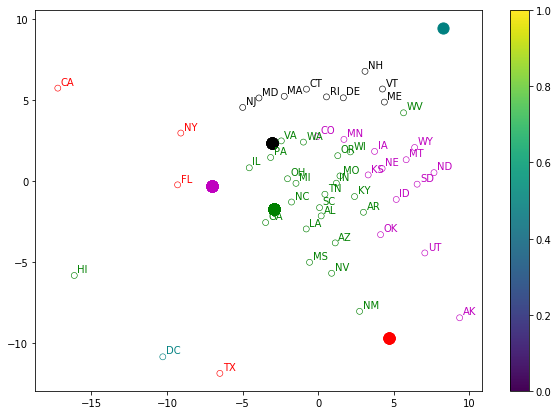

In [202]:
# Problem 3
# Insert your work here

merged = Answer2.merge(Answer1,on='State') # get the value of State
merged = merged.merge(X[['Abbrev','State']],on=['State']) # get the value of Abbrev

cmap = ['red','teal','green','m','black'] # set custom color method
Answer3 = pd.DataFrame(mds.fit_transform(k_mean.cluster_centers_),columns=['X','Y'])# entroids AKA Answer


# Plotting

from pylab import rcParams
rcParams['figure.figsize'] = (10,7) # set figure Size

for i in range(merged.shape[0]):
    #add data points  to scatter plots
    x=merged['X'][i]
    y=merged['Y'][i]
    text = merged['Abbrev'][i]
    label = merged['Label'][i]
    # get values
    
    scatter = plt.scatter(x=x,y=y,color=cmap[label],marker='o',label=label,linewidth=0.6,facecolor='none')
    # show cluster center of mean of points
    plt.text(x=x+0.2,y=y+0.2,s=merged['Abbrev'][i],color=cmap[label]) # use text
    
    plt.scatter(Answer3['X'][label],Answer3['Y'][label],marker='o',s=125,color=cmap[label])
    
plt.colorbar(scatter)
    
    # plot centroids

It looks like the centroids are not near the Centroids. It is due to the fact that We have transformeed the data in 2 Dimensions where the original data was in 50 Dimensions during K-Means. So instead of looking at the circle or square of a cluster, we can think of a Sphere or 3-D cube in 3  dimensional space where the centroid is in  the middle of it and every point is surrounding the centroid. That is the case with just the 3 Dimensions. So in 50 dimensions hypercude, it is even more complex procedure as the 2D is not the exact representation of 50D in MDS. PCA might help I suppose because of the preserved variances but that is not the case here.

In [200]:
Answer3 # index represent the label number

,X,Y
0,4.719086,-9.691816
1,8.247732,9.430833
2,-2.903901,-1.748400
3,-7.028508,-0.350252
4,-3.034409,2.359634


__________________________________________________________________________________________________________

# Problem 4

**Problem 4. (20 points)** Is there a natural number of clusters for the States data?  Conduct an "elbow" analysis by re-running k-means with all possible values of k. Display a line plot, with circle markers, of 'total within-cluster variance' (kmeans.inertia_ ) as a function of k.  To get good results, you will want to use the default init='k-means++' parameter. For reasonable running times, use n_init=3 and max_iter=20.

In Answer4, return the results as a DataFrame with columns 'K' and 'Inertia', sorted by increasing K. 

## Answer 4

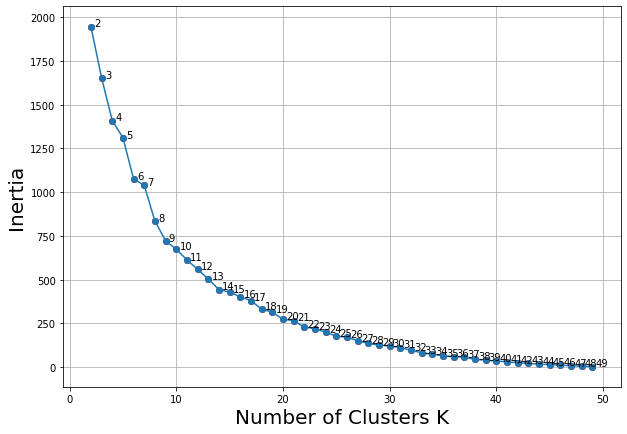

In [209]:
# Problem 4
# Insert your work here
  
cluster_range=range(2,50)  # setting a cluster ranger from 2 to 50
cluster_error=[]    # to capture the errors in the clusters

for num in cluster_range:  #loop to check cluster errors for different number of clusters
    k_mean = KMeans(n_clusters=num,random_state=SEED,n_init=3,max_iter=20).fit(X_input) 
    # fitting the data in the clustering model.
    cluster_error.append(k_mean.inertia_)  
    # getting the cluster errors and appending a list names cluster error.
    
    
Answer4=pd.DataFrame({'K':cluster_range, 'Inertia':cluster_error}) # Required Answer Dataframe.

from pylab import rcParams
rcParams['figure.figsize'] = (10,7)  # updating the figsize
plt.plot(Answer4['K'], Answer4['Inertia'], marker="o")  # plotting the elbow plot.
for i,t in enumerate(Answer4['K']):
    x = Answer4['K'][i]
    y = Answer4['Inertia'][i]
    # get values of the X, Y coordinates
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, t, fontsize=10) # annote the values

plt.xlabel('Number of Clusters K', fontsize=20)
plt.ylabel('Inertia', fontsize=20)
# set x, y axis label
plt.grid()
plt.show()

In [208]:
Answer4

,K,Inertia
0,2,1947.383849
1,3,1654.575757
2,4,1410.031641
3,5,1311.993953
4,6,1076.509725
5,7,1039.152004
6,8,835.525415
7,9,722.489591
8,10,673.604777
9,11,613.775925


__________________________________________________________________________________________________________

# Problem 5

**Problem 5. (20 points)**  Complete the following sentence: "There are two kinds of people in the world (well, in our class anyway), ..."  How would you describe those two kinds of people?

Using the Survey data, z-score normalize the quantitative data, and then use k-means and Parallel Coordinates visualization of centroids to find the answer.
Hint:  Use clustering, and find out what is most different about their centroids.  Rerun your analysis several times to see what columns are most consistently most different.  Since this data is more complex, use n_init=100, max_iter=100.  Visually justify your claim with a Parallel Coordinates plot of the z-score centroids.

In Answer5, return a Series, indexed by the quantitative column names, containing the absolute-value difference between the z-score centroids, sorted in decreasing magnitude.

## Answer 5

In [214]:
survey.nunique()

Name          86
Major         11
Status         5
Prog           2
Years          9
Age            7
Height        20
Born          71
Bedtime       11
Awake         26
Pets          21
Extrovert     27
Cook          21
Spender       23
Minutes       43
Photos        43
Friends       54
Followers     52
Mac           19
Books         11
Countries     17
States        26
Homes         14
Temp          22
Spicy         24
Siblings       8
Camp          22
Football      24
Birthday      74
Programmer    22
Math          20
Langs         12
HD            51
Smoothie      17
dtype: int64

"There are two kinds of people in the world (well, in our class anyway), **One who use ```Python``` and the other who use ```R```**" because of the fact they use one of the 2 programming language" as suggesed by the above line of code.

In [ ]:
# Problem 5
# Insert your work here



Name          86
Major         11
Status         5
Prog           2
Years          9
Age            7
Height        20
Born          71
Bedtime       11
Awake         26
Pets          21
Extrovert     27
Cook          21
Spender       23
Minutes       43
Photos        43
Friends       54
Followers     52
Mac           19
Books         11
Countries     17
States        26
Homes         14
Temp          22
Spicy         24
Siblings       8
Camp          22
Football      24
Birthday      74
Programmer    22
Math          20
Langs         12
HD            51
Smoothie      17
dtype: int64

In [ ]:
# scratch space
